## Задача 1
###  Условие задачи

В цехах N1 и N2 предприятия производится продукт Y, который в дальнейшем используется
в качестве исходного материала для производства изделий в цехе N3. Суммарная производительность цехов N1 и N2 зависит от вложения дополнительных средств X. При работе цехов N1 и N2 в течение одного месяца эта зависимость может быть приближенно представлена в виде функций:  
* $N1: y = 5+(x+40)^{2/3};$
* $N2: y = 7+(x+30)^{1/2};$  
Функции остатка средств в течение месяца: 
* $N1: 0.7x;$
* $N2: 0.94x;$  
Средства, выделяемые на оба цеха в течение квартала (3 месяца), составляют 174 единиц; перераспределение производится помесячно.  
 Требуется распределить средства на планируемый квартал с целью получения максимального количества продукта Y.
 
###  Формальная постановка  
*Выигрыш* в данной задаче соответствует количества продукта Y ($W_{i}$).   
*Управление* - это количество средств, вносимых на данном этапе принятия решения. Обозначим переменную, задающую управления, через x.      
*Состояние* - В каждой точке принятия решения управляемая система описывается двумя параметрами: остаток средств (обозначим через k) и количество среств. По аналогии с управлением будем обозначать различные состояния при помощи нижней индексации: $k_{1}, k_{2}, k_{3}$.     
Используя введенные переменные, запишем основное функциональное уравнение динамического программирования (ДП):    
$W_{i} (k_{i}) = max_{x_{i}<=k_{i}} \{ 12 + (x+40)^{2/3} + (x+30)^{1/2} + W_{i+1} (0.7x+0.94(k-x)) \}$

### Решение
Средства, выделяемые на оба цеха в течение квартала (3 месяца), составляют 174 единиц.    
Перераспределение средств помесячное, поэтому задачу можно разбить на 3 этапа.  
Обозначим главное понятия динамического программирования:  
Выигрыш - максимум произведенных продуктов на обеих цехах N1 и N2.  
Управление - принятие решения по распределению средств.  
Состояние - остаток средств от обеих цехов.  

Для рассчётов использую python 3.7, код:  


### Code for finding final solution

### Step by step

Построим графики зависимости  условно максимальной производительности ${W_3}$ и условно оптимального управления ${x_3}$ от ${k_3}$:


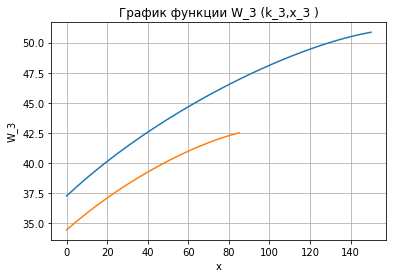

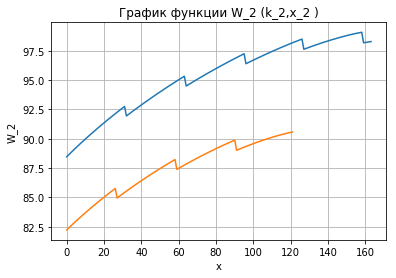

Total Win W1=  145.04727196399372


array([154., 154., 154., 154., 154., 154., 154., 154., 154., 154.,   0.])

In [177]:
#-*-coding: utf-8-*-
import matplotlib.pyplot as plt
import numpy as np

iteration = 0
start_k = 174
# Призводительность цеха 1
def f1(x):
    return 5 + np.power((x + 40),2/3) 

# Призводительность цеха 2
def f2(x):
    return 7 + np.power((x + 30),1/2)

# Общая производительность за месяц
def w(k, x):
    return (f1(x)+f2(k-x))

# Остаток производства за месяц
def phi(k,x):
    return (0.7 *x + 0.94*(k-x))

# Вычисление условного оптимального выигрыша при заданном остатке k
def  W(k,ks,Ws):
    xs =  np.arange(k+1)
    next_k = phi(k,xs)
    vals = w(k,xs) + Ws[np.searchsorted(ks,next_k)]
    besti = np.argmax(vals)
    return (vals[besti],xs[besti])

# Вычисление условного оптимального выигрыша при заданном остатке k и заданных
# управлениях xs.
def Wx(k, xs, ks, Ws):
    next_k = phi(k, xs)
    return w(k,xs) + Ws[np.searchsorted(ks, next_k)]

#Для  3-го месяца
k_4 = np.linspace(0.7**3*174,0.94**3*174,10)
W_4 = np.zeros(len(k_4)+1)
k3_min = 0.7**2*174
k3_max = 0.94**2*174
k_3 = np.linspace(k3_min,k3_max,10)
W_3 = np.zeros(len(k_4)+1)
x_3 = W_3
for i in range(len(k_3)):
    (W_3[i],x_3[i]) = W(k_3[i],k_4,W_4)
    
x3_min = np.arange(0,k3_min,5)
x3_max = np.arange(0,k3_max,5)
W_3 = np.linspace(np.max(w(k3_min,x3_min)),np.max(w(k3_max,x3_max)),10)
plt.plot(x3_max,w(k3_max,x3_max),x3_min,w(k3_min,x3_min))
plt.xlabel('x')
plt.ylabel('W_3')
plt.grid(True)
plt.title('График функции W_3 (k_3,x_3 )')
plt.show()

#Для  2-го месяца
k2_min = 0.7**1*174
k2_max = 0.94**1*174
k_2 = np.linspace(k2_min,k2_max,10)
W_2 = np.zeros(len(k_2)+1)
x_2 = W_2
for i in range(len(k_2)):
    (W_2[i],x_2[i]) = W(k_2[i],k_3,W_3)
    
x2_min = np.arange(k2_min)
x2_max = np.arange(k2_max)
w2_max = Wx(k2_max, x2_max, k_3, W_3);
w2_min = Wx(k2_min, x2_min, k_3, W_3);
W_2 = np.linspace(np.max(w2_min),np.max(w2_max),10)
plt.plot (x2_max,w2_max,x2_min,w2_min);
plt.xlabel('x')
plt.ylabel('W_2')
plt.grid(True)
plt.title('График функции W_2 (k_2,x_2 )')
plt.show()

#Для  1-го месяца
k1_max = 174
x1_max = np.arange(k1_max)
k_1 = np.linspace(0.7**0*174,0.94**0*174,10)
W_1 = np.zeros(len(k_1)+1)
x_1 = W_1
for i in range(len(k_1)):
     (W_1[i],x_1[i]) = W(k_1[i],k_2,W_2)
w1_max = Wx(k1_max,x1_max,k_2,W_2)
W_1 = np.max(w1_max)
print("Total Win W1= ",W_1)
plt.show()
x_1

Осуществим прямую прогонку решения задачи, для этого определим на единственной кривой графика $W_{1}(k_{1}, x_{1})$ максимум, находим оптимальное управление на первом шаге $x_{1}=154$, показывающее, сколько средств надо вкладывать в первый цех, и соответствующую максимальную производительность за месяц $W_{1} = 145.04$, а также количество средств вкладываемые во второй цех:    
${x_{1(2)}} = k_{1}-x_{1}=174-154=20$    
Находим соответствующий запас средств к концу первого шага:  
$k_{2}=x_{1}*0.7+x_{1(2)} *0.94=126.6 ≈127$  
Найдем оптимальное управление на втором шаге, показывающее сколько средств нужно вкладывать в первый цех:
$x_{2} ≈ 108;$  
А также количество средств вкладываемых во второй цех:  
$x_{2(2)} =k_{2}-x_{2}=127-108=19$   
Остаток средств к концу второго шага будет  
$k_{3}=x_{2}*0.7+x_{2(2)} *0.94=93.46≈94$  
Найдем оптимальное управление на третьем шаге, показывающее сколько средств нужно вкладывать в первый цех: $x_{3} = 94$  
А также количество средств вкладываемых во второй цех:  
$x_{3(2)} =k_{3}-x_{3}=94-94=0$  
Остаток средств к концу третьего шага будет  
$x_{3}*0.7+x_{3(2)} *0.94=65.8$ 



Таким образом, можно сформулировать следующие рекомендации по оптимальному распределению средств. Из имеющегося в начале квартала запаса средств k=174 усл. ед. и остающихся средств в конце каждого месяца нужно вкладывать по месяцам в цеха I и II следующие суммы:  
Оптимальный план будет иметь вид:  

| Месяц                               | 1   | 2   | 3  |
|-------------------------------------|-----|-----|----|
| Средства, выделяемые на первом цехе | 154 | 108 | 94 |
| Средства, выделяемые на втором цехе | 20  | 19  | 0  | 

При таком планировании будет получена максимальная производительность за месяц, равная 145 усл. ед.  
Определим остаток средств на конец квартала: 94* 0.7 + 0 * 0.94 = 65 усл. ед.